<a href="https://colab.research.google.com/github/nischitabiradar/Financial-Product-Compliant-Research/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,4
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BDA 594 Project/complaints_CFPB.csv')

In [ ]:
df.head(10)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-08-24,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,Experian Information Solutions Inc.,NJ,07024,NaN,Other,Web,2023-08-24,In progress,Yes,NaN,7452639
1,2023-08-23,"Credit reporting, credit repair services, or o...",Other personal consumer report,Incorrect information on your report,Information that should be on the report is mi...,NaN,NaN,LEXISNEXIS,FL,32258,NaN,Other,Web,2023-08-23,In progress,Yes,NaN,7442688
2,2023-07-22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"Nelnet, Inc.",IL,61103,NaN,NaN,Web,2023-08-23,Closed with explanation,Yes,NaN,7284490
3,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,NaN,"EQUIFAX, INC.",TN,38116,NaN,NaN,Web,2023-08-23,Closed with non-monetary relief,Yes,NaN,7442979
4,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,"EQUIFAX, INC.",NV,89147,NaN,NaN,Web,2023-08-25,Closed with explanation,Yes,NaN,7582004
5,2023-06-09,Debt collection,Auto debt,Took or threatened to take negative or legal a...,Sued you without properly notifying you of law...,On XX/XX/XXXX consumer credit monitoring servi...,NaN,CL HOLDINGS LLC,GA,30238,NaN,Consent provided,Web,2023-06-09,Closed with explanation,Yes,NaN,7096763
6,2023-09-19,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,NaN,NaN,AmeriCollect,FL,34234,NaN,NaN,Web,2023-09-19,Closed with explanation,Yes,NaN,7575152
7,2023-08-07,Student loan,Private student loan,Struggling to repay your loan,Can't temporarily delay making payments,NaN,NaN,"Nelnet, Inc.",IL,620XX,NaN,NaN,Web,2023-09-08,Closed with explanation,Yes,NaN,7365193
8,2023-08-23,Checking or savings account,Checking account,Managing an account,Cashing a check,NaN,NaN,JPMORGAN CHASE & CO.,NY,11372,NaN,NaN,Web,2023-08-23,Closed with explanation,Yes,NaN,7448221
9,2023-07-18,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,NaN,Company disputes the facts presented in the co...,HF Holdings,GA,30012,NaN,Consent not provided,Web,2023-09-21,Closed with explanation,Yes,NaN,7260474


In [ ]:
df.shape

(4105592, 18)

In [ ]:
df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [ ]:
df.isna().sum()

Date received                         0
Product                               0
Sub-product                      235291
Issue                                 0
Sub-issue                        716978
Consumer complaint narrative    2617601
Company public response         2202817
Company                               0
State                             43234
ZIP code                          30213
Tags                            3677970
Consumer consent provided?       901879
Submitted via                         0
Date sent to company                  0
Company response to consumer          5
Timely response?                      0
Consumer disputed?              3337234
Complaint ID                          0
dtype: int64

In [ ]:
print(df['Tags'].value_counts(), end='\n')


Servicemember                    247591
Older American                   144885
Older American, Servicemember     35146
Name: Tags, dtype: int64


In [ ]:
print(df['Consumer disputed?'].value_counts(), end='\n')


No     619980
Yes    148378
Name: Consumer disputed?, dtype: int64


In [ ]:
df["Tags"].fillna("No Tags", inplace = True)

In [ ]:
df.columns=['DateReceived','Product','SubProduct','Issue','SubIssue','ConsumerComplaintNarrative','CompanyPublicResponse','Company','State','ZipCode','Tags',
           'ConsumeConsentProvided','SubmittedVia','DateSentToCompany','CompanyResponseToConsumer','TimelyResponse','ConsumerDisputed','ComplaintID']
print(df.columns)

Index(['DateReceived', 'Product', 'SubProduct', 'Issue', 'SubIssue',
       'ConsumerComplaintNarrative', 'CompanyPublicResponse', 'Company',
       'State', 'ZipCode', 'Tags', 'ConsumeConsentProvided', 'SubmittedVia',
       'DateSentToCompany', 'CompanyResponseToConsumer', 'TimelyResponse',
       'ConsumerDisputed', 'ComplaintID'],
      dtype='object')


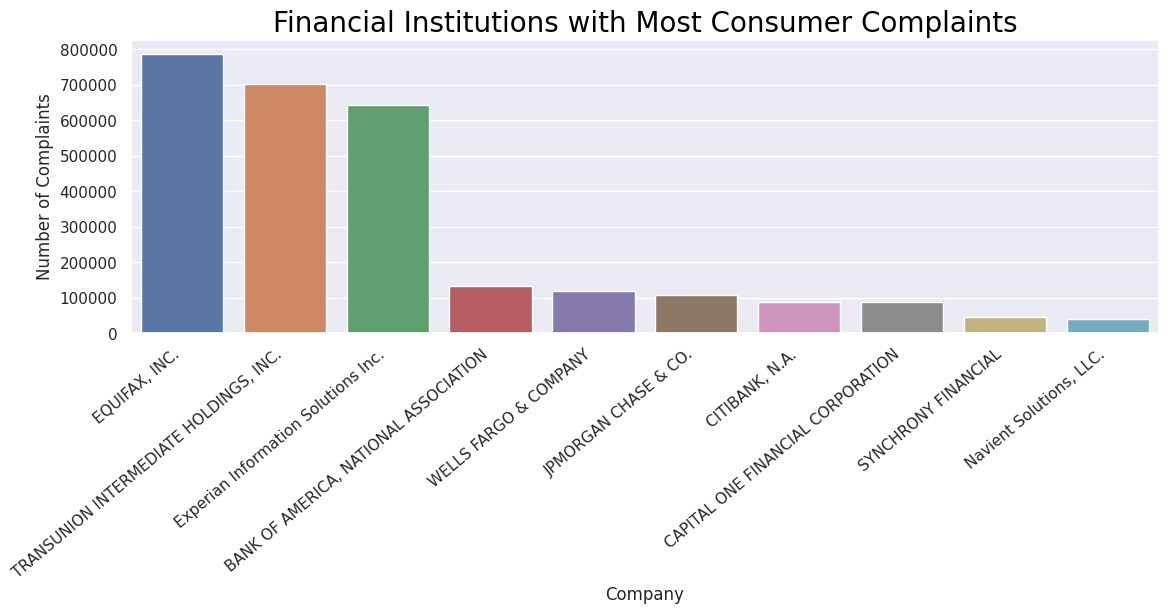

In [ ]:
sns.set(rc={'figure.figsize':(12,6)})
ax = sns.countplot(x='Company', data=df,
                  order=df.Company.value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.ylabel('Number of Complaints')
plt.title("Financial Institutions with Most Consumer Complaints", fontsize=20,
         color='Black')
plt.show()

In [ ]:
df.Product.unique()

array(['Credit reporting, credit repair services, or other personal consumer reports',
       'Credit reporting or other personal consumer reports',
       'Debt collection', 'Student loan', 'Checking or savings account',
       'Vehicle loan or lease', 'Credit card or prepaid card', 'Mortgage',
       'Money transfer, virtual currency, or money service',
       'Credit card',
       'Payday loan, title loan, personal loan, or advance loan',
       'Debt or credit management', 'Prepaid card',
       'Payday loan, title loan, or personal loan',
       'Bank account or service', 'Consumer Loan', 'Credit reporting',
       'Money transfers', 'Payday loan', 'Other financial service',
       'Virtual currency'], dtype=object)

In [ ]:
df['Product'].replace(
    to_replace=['Credit reporting, credit repair services, or other personal consumer reports'],
    value='Credit reporting',
    inplace=True
)
df['Product'].replace(
    to_replace=['Credit card'],
    value='Credit card or prepaid card',
    inplace=True
)

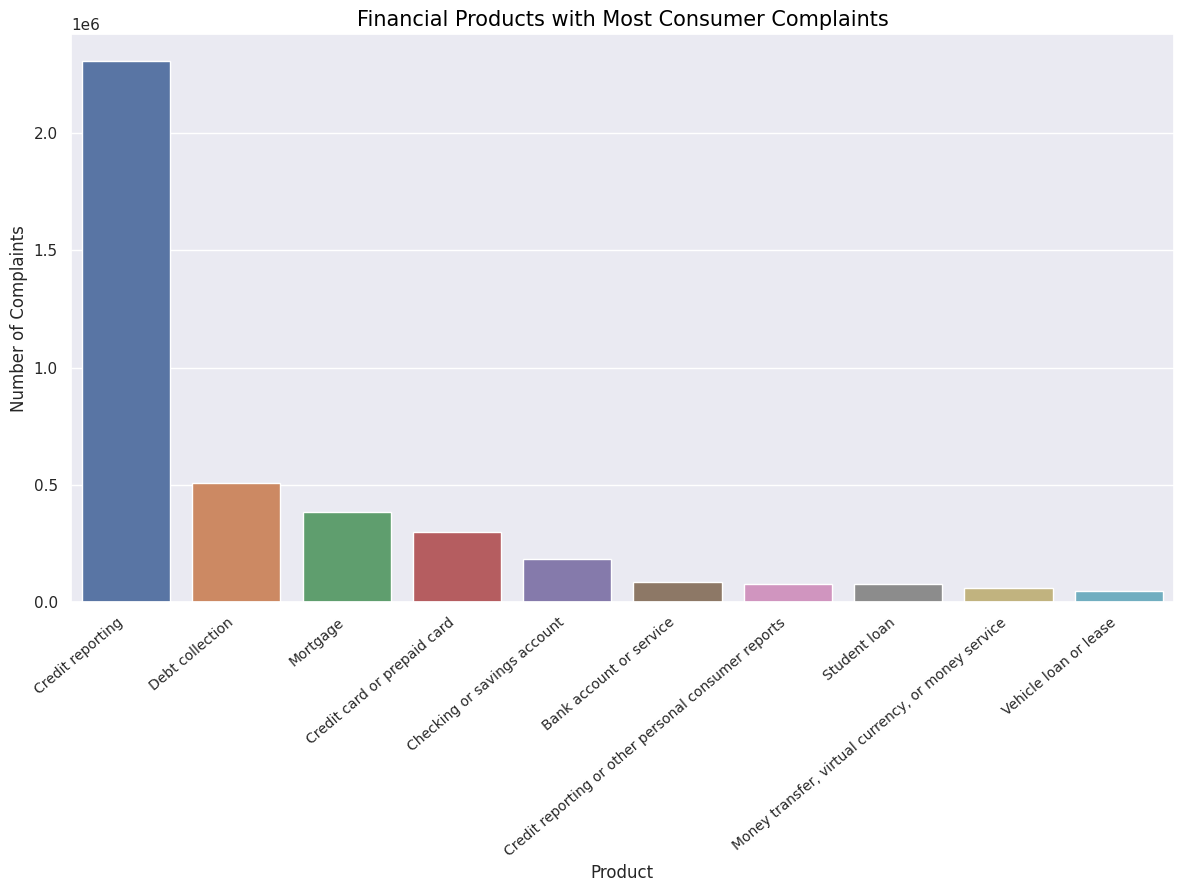

In [ ]:
sns.set(rc={'figure.figsize':(12,9)})
prods = sns.countplot(x='Product', data=df,
                  order=df.Product.value_counts().iloc[:10].index)
prods.set_xticklabels(prods.get_xticklabels(), rotation=40, ha="right", fontsize=10)
plt.ylabel("Number of Complaints")
plt.tight_layout()
plt.title("Financial Products with Most Consumer Complaints", fontsize=15,
         color='Black')
plt.show()

In [ ]:
dfs=df['State'].value_counts().reset_index()

In [ ]:
dfs.columns=['State','Count']
dfs.head()

,State,Count
0,CA,479160
1,FL,474816
2,TX,420578
3,GA,273740
4,NY,263308


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=dfs['State'],
    z = dfs['Count'].astype(float),
    locationmode = 'USA-states',
    colorscale = 'purples',
    colorbar_title = "Number of Complaints",
))

fig.update_layout(
    title_text = 'Consumer Complaints by State',
    geo_scope='usa',
)

fig.show()

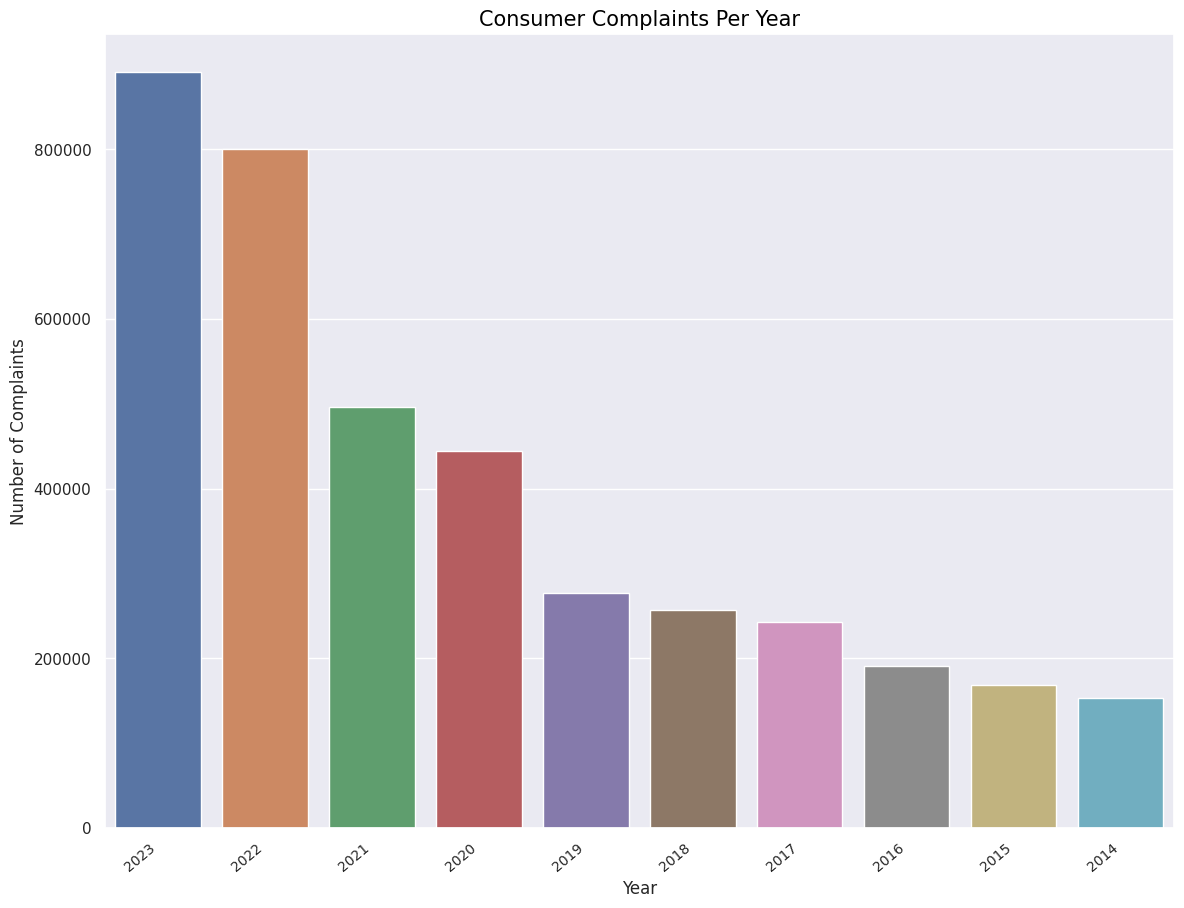

In [ ]:
df['Year'] = pd.DatetimeIndex(df['DateReceived']).year
sns.set(rc={'figure.figsize':(12,9)})
prods = sns.countplot(x='Year', data=df,
                  order=df.Year.value_counts().iloc[:10].index)
prods.set_xticklabels(prods.get_xticklabels(), rotation=40, ha="right", fontsize=10)
plt.ylabel("Number of Complaints")
plt.tight_layout()
plt.title("Consumer Complaints Per Year", fontsize=15,
         color='Black')
plt.show()

In [ ]:
complaint_counts = df['Company'].value_counts().reset_index()
complaint_counts.columns = ['Company', 'Complaints']
print(complaint_counts)

                                     Company  Complaints
0                              EQUIFAX, INC.      786850
1     TRANSUNION INTERMEDIATE HOLDINGS, INC.      702618
2        Experian Information Solutions Inc.      643907
3      BANK OF AMERICA, NATIONAL ASSOCIATION      131798
4                      WELLS FARGO & COMPANY      119951
...                                      ...         ...
6950                  Melar Investments, LLC           1
6951               1st Capital Mortgage, LLC           1
6952               Select One Mortgage, Inc.           1
6953                Mann & Carducci Co., LPA           1
6954                   Midwest Credits, Inc.           1

[6955 rows x 2 columns]


In [ ]:
df['Month'] = pd.DatetimeIndex(df['DateReceived']).month

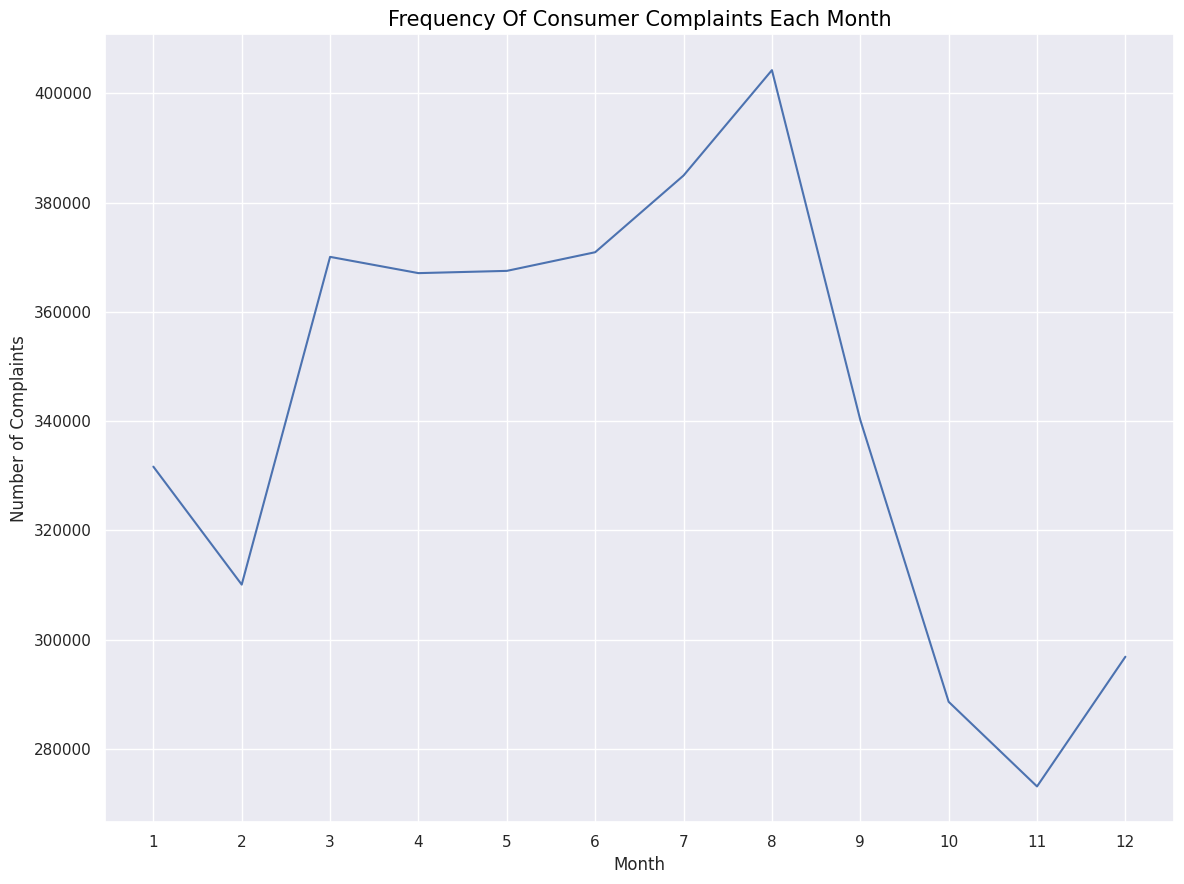

In [ ]:
# Aggregate the data to count complaints per year
complaints_per_year = df['Month'].value_counts().sort_index()
# Set the figure size
sns.set(rc={'figure.figsize': (12, 9)})
# Create a line plot
prods = sns.lineplot(x=complaints_per_year.index, y=complaints_per_year.values)
plt.xticks(range(1, 13))
# Set labels and title
plt.xlabel("Month")
plt.ylabel("Number of Complaints")
plt.title("Frequency Of Consumer Complaints Each Month", fontsize=15, color='Black')
# Show the plot
plt.tight_layout()
plt.show()

**Most Number of Complaints in August - Would be nice to explore Why?**

In [ ]:
 print(df['Issue'].value_counts(), end='\n')

Incorrect information on your report                                                1073960
Problem with a credit reporting company's investigation into an existing problem     590174
Improper use of your report                                                          535586
Attempts to collect debt not owed                                                    182405
Managing an account                                                                  112329
                                                                                     ...   
Issues with repayment                                                                     5
Issue where my lender is my school                                                        4
Lender damaged or destroyed property                                                      3
Unexpected fees                                                                           1
Issue with income share agreement                                               

In [ ]:
df.Issue.unique()

array(["Problem with a credit reporting company's investigation into an existing problem",
       'Incorrect information on your report',
       'Took or threatened to take negative or legal action',
       'Communication tactics', 'Struggling to repay your loan',
       'Managing an account', 'Attempts to collect debt not owed',
       'Problem caused by your funds being low',
       'Improper use of your report',
       "Problem with a company's investigation into an existing problem",
       'Managing the loan or lease', 'Trouble using your card',
       'Written notification about debt',
       'Applying for a mortgage or refinancing an existing mortgage',
       'Fraud or scam', 'Other features, terms, or problems',
       'Electronic communications', 'Getting a credit card',
       'Fees or interest', 'Closing your account', 'Closing an account',
       'Trouble accessing funds in your mobile or digital wallet',
       'Problem with a purchase shown on your statement',
       'Cl

In [ ]:
import plotly.express as px

issue_counts = df['Issue'].value_counts()

# Choose the top N issues to display
N = 5
top_issues = issue_counts.head(N)

# DataFrame for the top issues
top_issues_df = pd.DataFrame({'Issue': top_issues.index, 'Count': top_issues.values})

# Radar chart using Plotly Express
fig = px.line_polar(top_issues_df, r='Count', theta='Issue', line_close=True)

# Customize the radar chart appearance
fig.update_traces(
    fill='toself',
    line_color='blue',  # Change line color
    fillcolor='rgba(135, 206, 250, 0.5)'  # Change fill color and transparency
)
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True),
        bgcolor='lightgray'  # Change background color of the polar area
    ),
    width=1500,
    height=600,
    paper_bgcolor='white'  # Change overall background color
)

# Adding bold annotations with color enhancement
for i, row in top_issues_df.iterrows():
    fig.add_annotation(
        x=row['Issue'], y=row['Count'],
        text=f"<b>{row['Count']}</b>",  # Bold text
        showarrow=False,
        font=dict(size=14, color='darkred')  # Change font size and color
    )

fig.show()
